## MNIST Example

**References**
* [USE OF CONVOLUTIONAL NEURAL NETWORK FOR IMAGE CLASSIFICATION](https://www.apsl.net/blog/2017/11/20/use-convolutional-neural-network-image-classification/)
* [TENSOR FLOW PARA PRINCIPIANTES (VI): USO DE LA API KERAS](ttps://www.apsl.net/blog/2018/02/02/tensor-flow-para-principiantes-vi-uso-de-la-api-keras/)
* [What is the difference between 'SAME' and 'VALID' padding in tf.nn.max_pool of tensorflow?
](https://stackoverflow.com/questions/37674306/what-is-the-difference-between-same-and-valid-padding-in-tf-nn-max-pool-of-t)
* [A guide to convolution arithmetic for deep
learning](https://arxiv.org/pdf/1603.07285v1.pdf)

**Step 1**: Import required funcitons and objects.

In [104]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

## Import the keras API
import keras
from keras.models import Sequential
from keras.models import Model
from keras.layers import InputLayer, Input
from keras.layers import Reshape, MaxPooling2D
from keras.layers import Conv2D, Dense, Flatten
from keras.optimizers import Adam

# Import dataset
from tensorflow.examples.tutorials.mnist import input_data

# Import utils
import model_utils as utils
import plot_utils as plot_utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


**Step 2**: Download MNIST dataset.

In [105]:
data = input_data.read_data_sets('data/MNIST/', one_hot=True)
data.test.cls = np.argmax(data.test.labels, axis=1)

Extracting data/MNIST/train-images-idx3-ubyte.gz
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz


**Step 3**: Setup parameters

In [106]:
# We know that MNIST images are 28 pixels in each dimension.
img_size = 28

# Images are stored in one-dimensional arrays of this length.
img_size_flat = img_size * img_size

# Tuple with height and width of images used to reshape arrays.
# This is used for plotting the images.
img_shape = (img_size, img_size)

# Tuple with height, width and depth used to reshape arrays.
# This is used for reshaping in Keras.
img_shape_full = (img_size, img_size, 1)

# Number of colour channels for the images: 1 channel for gray-scale.
num_channels = 1

# Number of classes, one class for each of 10 digits.
num_classes = 10

path_model = 'trained-model'

**Step 4**: Show first dataset elements.

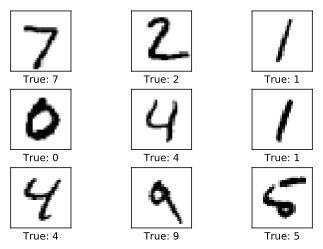

In [107]:
# Get the first images from the test-set.
images = data.test.images[0:9]

# Get the true classes for those images.
cls_true = data.test.cls[0:9]

# Plot the images and labels using our helper-function above.
plot_utils.plot_images(images=images, img_shape=img_shape, cls_true=cls_true)

**Step 5**: Build network model.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_5 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
Convolutional_Layer_1 (Conv2 (None, 24, 24, 16)        416       
_________________________________________________________________
Pooling_Layer_1 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
Convolutional_Layer_2 (Conv2 (None, 8, 8, 36)          14436     
_________________________________________________________________
Pooling_Layer_2 (MaxPooling2 (None, 4, 4, 36)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 576)               0         
_________________________________________________________________
Relu_Full_Connectted_Layer ( (None, 128)               73856     
__________

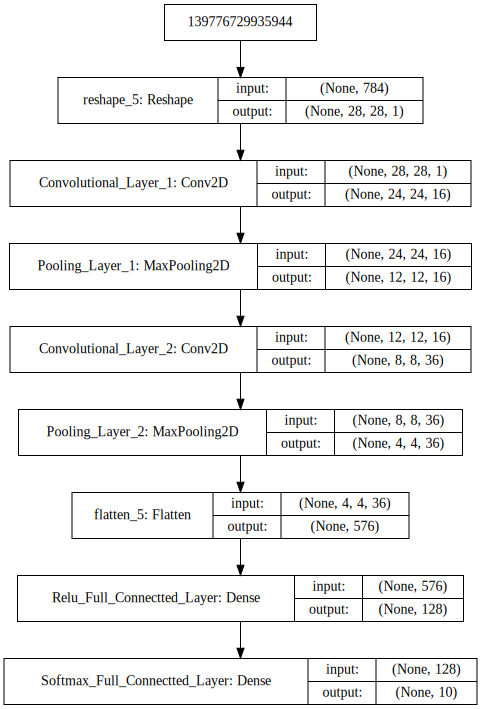

In [108]:
model = Sequential()

# Agrega una capa de entrada que es similar a un feed_dict en TensorFlow.
# Tenga en cuenta que la forma de entrada debe ser una tupla que contenga el tamaño de la imagen.
model.add(InputLayer(input_shape=(img_size_flat,)))

# La entrada es una matriz aplanada con 784 elementos (img_size * img_size),
# pero las capas convolucionales esperan imágenes con forma (28, 28, 1), por tanto hacemos un reshape
model.add(Reshape(img_shape_full))

# Primera capa convolucional con ReLU-activation y max-pooling.
model.add(Conv2D(
    kernel_size=5, 
    strides=1, 
    filters=16, 
    padding='valid', 
    activation='relu',
    name='Convolutional_Layer_1'
))
model.add(MaxPooling2D(
    pool_size=2, 
    strides=2, 
    name='Pooling_Layer_1'
))

# Segunda capa convolucional con ReLU-activation y max-pooling
model.add(Conv2D(
    kernel_size=5,
    strides=1,
    filters=36,
    padding='valid', 
    activation='relu',
    name='Convolutional_Layer_2'
))
model.add(MaxPooling2D(
    pool_size=2,
    strides=2,
    name='Pooling_Layer_2'
))


# Aplanar la salida de 4 niveles de las capas convolucionales
# a 2-rank que se puede ingresar a una capa totalmente conectada 
model.add(Flatten())

# Primera capa completamente conectada  con ReLU-activation.
model.add(Dense(
    128,
    activation='relu', 
    name='Relu_Full_Connectted_Layer'
))

# Última capa totalmente conectada con activación de softmax
# para usar en la clasificación.
model.add(Dense(
    num_classes,
    activation='softmax', 
    name='Softmax_Full_Connectted_Layer'
))

utils.show_model(model)

In [133]:
optimizer = Adam(lr=1e-3)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

**Step 6**: Train model

In [110]:
model.fit(
    x=data.train.images,
    y=data.train.labels,
    epochs=1, 
    batch_size=128
)

Epoch 1/1
55000/55000 [==============================] - 13s 243us/step - loss: 0.2523 - acc: 0.9250


In [111]:
result = model.evaluate(x=data.test.images, y=data.test.labels)

10000/10000 [==============================] - 1s 124us/step


In [112]:
[print(f'{name}: {value}') for name, value in zip(model.metrics_names, result)]

loss: 0.06111503400327638
acc: 0.9821


[None, None]

**Step 7**: Test model.

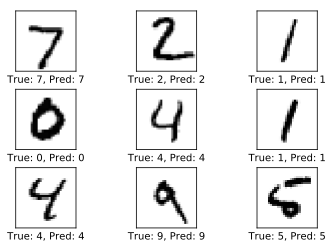

In [113]:
y_pred = model.predict(x=images)

images = data.test.images[0:9]
cls_true = data.test.cls[0:9]
cls_pred = np.argmax(y_pred, axis=1)

plot_utils.plot_images(images=images, img_shape=img_shape, cls_true=cls_true, cls_pred=cls_pred)

**Step 8**: Save trained model.

In [114]:
utils.save(model)

**Step 9**: Load previously trained model

In [115]:
utils.load(model)

## Graph convolutional outputs

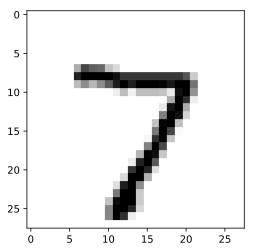

In [116]:
image1 = data.test.images[0]
plot_utils.plot_image(image1, img_shape)

### Show outputs by layer

Get layers:

In [125]:
layer_input = model.layers[0]

layer_conv_1 = model.layers[1]
layer_pooling_1 = model.layers[2]

layer_conv_2 = model.layers[3]
layer_pooling_2 = model.layers[4]

Get models between input and each layer.

In [126]:
conv_layer_1_model = Model(inputs=layer_input.input, outputs=layer_conv_1.output)
conv_layer_2_model = Model(inputs=layer_input.input, outputs=layer_conv_2.output)

layer_pooling_1_model = Model(inputs=layer_input.input, outputs=layer_pooling_1.output)
layer_pooling_2_model = Model(inputs=layer_input.input, outputs=layer_pooling_2.output)

### Show pooling layers output

(1, 12, 12, 16)


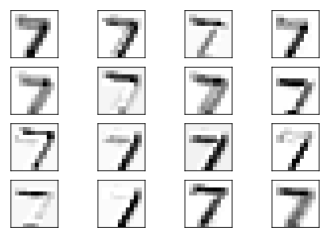

In [127]:
output = layer_pooling_1_model.predict(np.array([image1]))

print(output.shape)
plot_utils.plot_conv_output(values=output)

(1, 4, 4, 36)


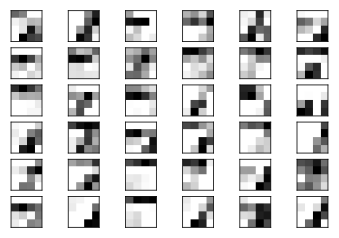

In [128]:
output = layer_pooling_2_model.predict(np.array([image1]))

print(output.shape)
plot_utils.plot_conv_output(values=output)

### Show convolutional layers output

(1, 24, 24, 16)


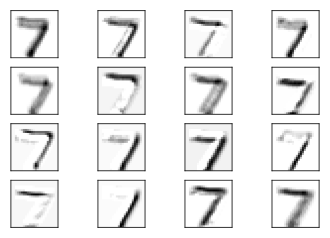

In [129]:
output = conv_layer_1_model.predict(np.array([image1]))

print(output.shape)
plot_utils.plot_conv_output(values=output)

(1, 8, 8, 36)


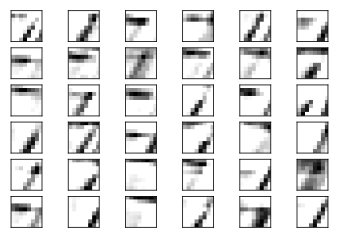

In [130]:
output = conv_layer_2_model.predict(np.array([image1]))

print(output.shape)
plot_utils.plot_conv_output(values=output)

## Show convolucional weights (Filters)

(5, 5, 1, 16)


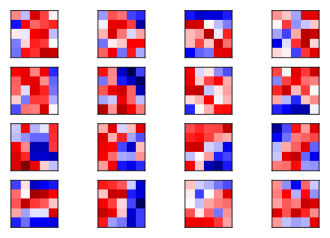

In [131]:
weights =  layer_conv_1.get_weights()[0]
print(weights.shape)
plot_utils.plot_conv_weights(weights=weights, input_channel=0)

(5, 5, 16, 36)


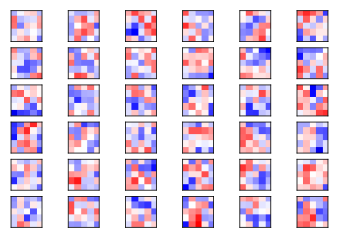

In [132]:
weights = layer_conv_2.get_weights()[0]
print(weights.shape)
plot_utils.plot_conv_weights(weights=weights, input_channel=0)